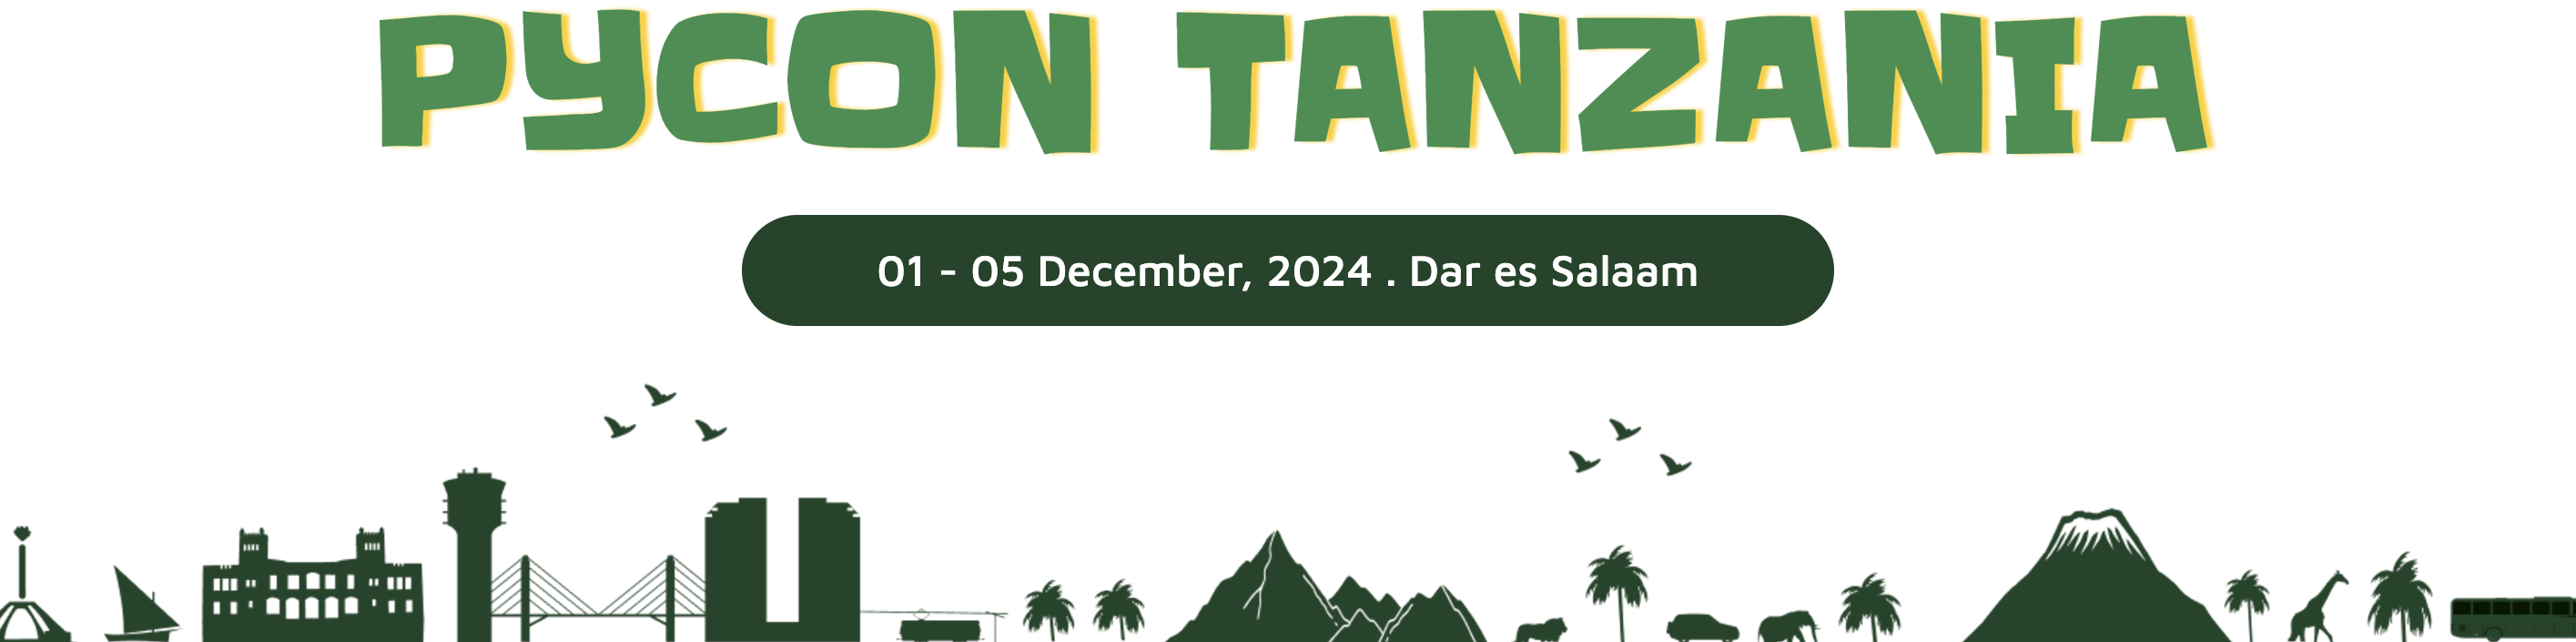

### Students performance in exams¶

Inferences would be :¶
1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?
4. Other inferences

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Pandas for importing dataset

In [3]:
df=pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print(df.shape)

(1000, 8)


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Let us explore the Math Score first

In [7]:
passmark =40

In [8]:
df['Math_PassStatus']=np.where(df['math score']<passmark,'F','P')

In [9]:
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

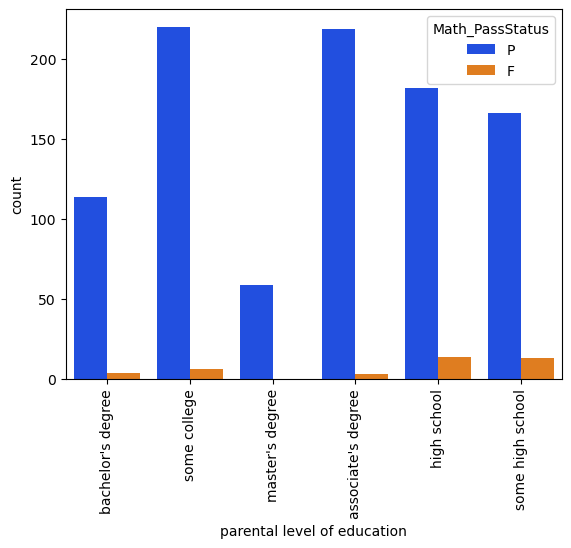

In [10]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Let us explore the Reading score

In [11]:
#How many studends passed in reading ?
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()


P    974
F     26
Name: Reading_PassStatus, dtype: int64

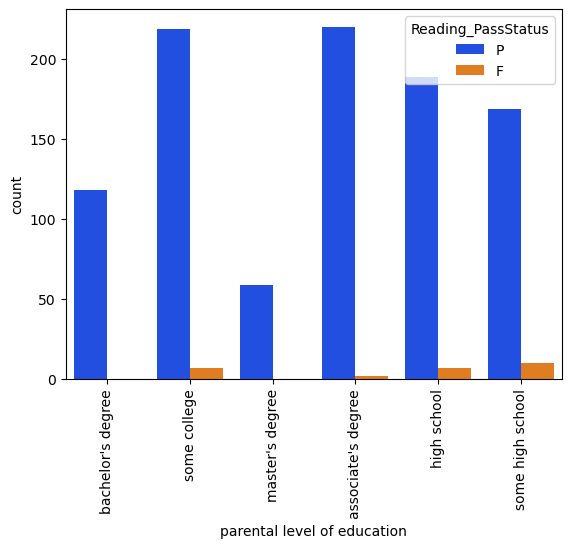

In [12]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

### Let us explore writing score

In [13]:
#How many students passed writing ?
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()


P    968
F     32
Name: Writing_PassStatus, dtype: int64

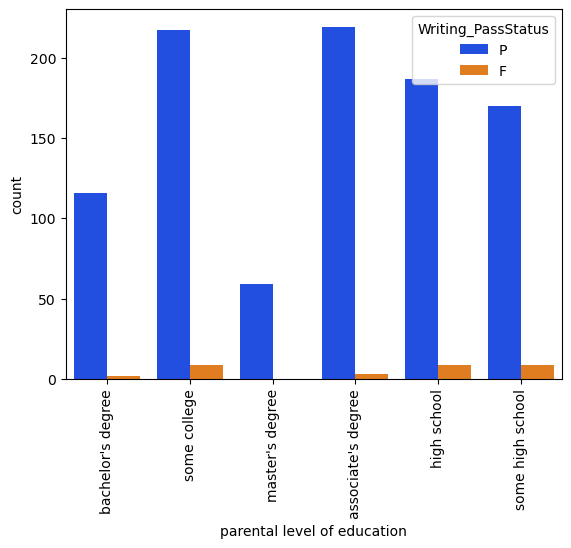

In [14]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [15]:
#Iet us check "How many students passed in all the subjects ?"
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

In [16]:
df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

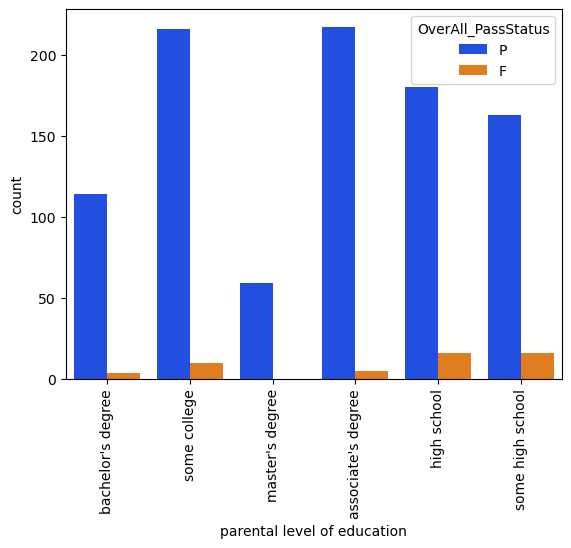

In [17]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [18]:
#Find the percentage of marks
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

Let us assign the grades¶
Grading
above 80 = A Grade
70 to 80 = B Grade
60 to 70 = C Grade
50 to 60 = D Grade
40 to 50 = E Grade
below 40 = F Grade ( means Fail )

In [19]:
def GetGrade(Percentage, OverAll_PassStatus):
#     if ( OverAll_PassStatus == 'F'):
#         return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    182
E     73
F     30
Name: Grade, dtype: int64

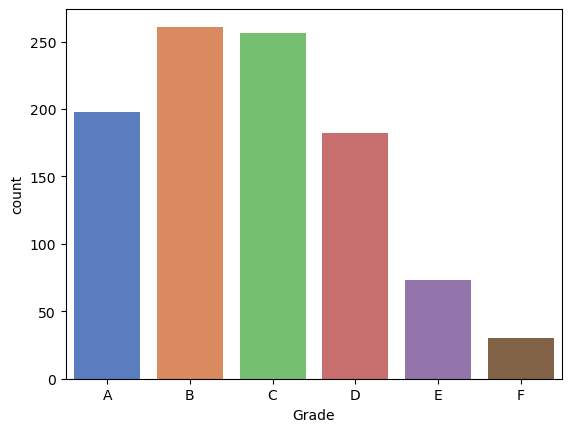

In [20]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

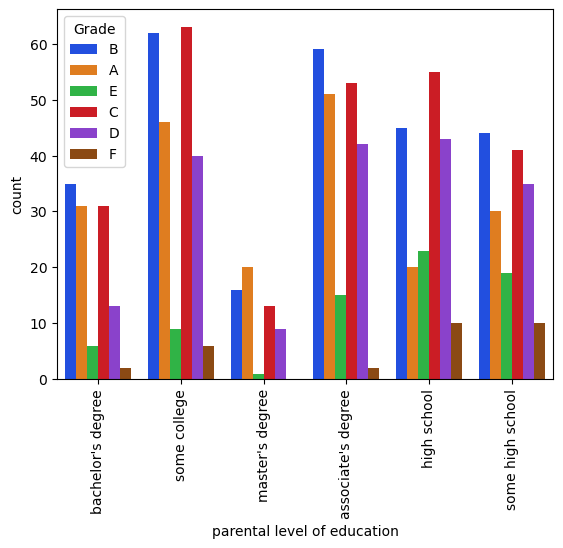

In [21]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Done:

    1. https://www.kaggle.com/code/spscientist/student-performance-in-exams
    
  

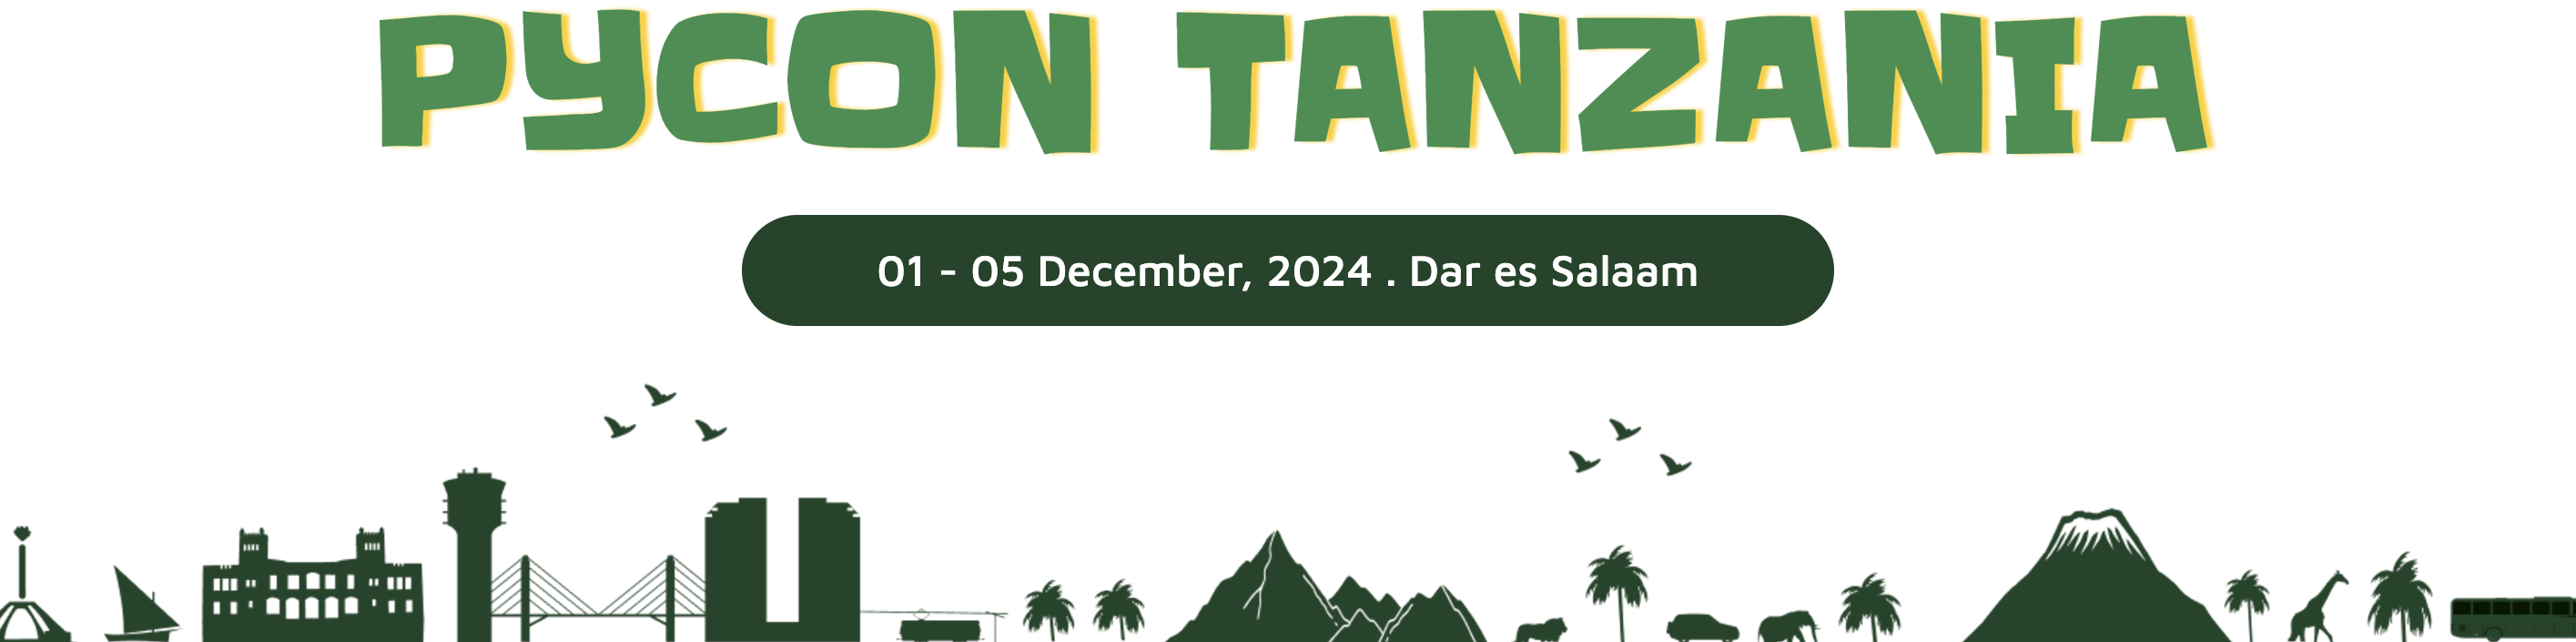